# Amazon Top 50 Best Seller Books EDA

In [30]:
# Loading the reqiured libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("bestsellers with categories.csv")

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## Features of the dataset
* Name: Name of the Book (String)
* Author: Author of the Book (String)
* User Rating: User Rating on Amazon of the Book (Float)
* Reviews: Reviews of the Book on Amazon (Float)
* Price: Price of the Book (Float)
* Year: Year it ranked on the Bestseller (Date)
* Genre: Wheather Fiction or Non-Fiction (String)

In [4]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [7]:
df.shape

(550, 7)

In [5]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [8]:
df.isnull().any()

Name           False
Author         False
User Rating    False
Reviews        False
Price          False
Year           False
Genre          False
dtype: bool

## Genre based exploration

In [11]:
df['Genre'].value_counts()

Genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64

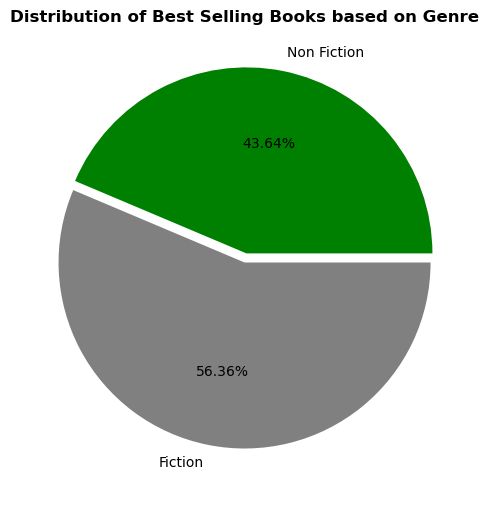

In [10]:
# Plotting pie chart for Genre Type
plt.figure(figsize=(10,5))
plt.pie(df['Genre'].value_counts().sort_values(), labels = df['Genre'].value_counts().index, explode = [0.05, 0], autopct = '%1.2f%%', colors = ['Green', 'grey'])
plt.subplots_adjust(bottom=0, top=0.93, left=0.5, right=1)
plt.title('Distribution of Best Selling Books based on Genre', fontweight = 'bold')
plt.show()

## Outlier Detection and treatment

Outlier Detection : Outliers are extreme values that deviate from other observations on data, they may indicate a variability in a measure.
We can use BoxPlots to detect outliers. The lower level and upper level outliers can be replaced by the 5th and 95th percentile respectively.

<Axes: >

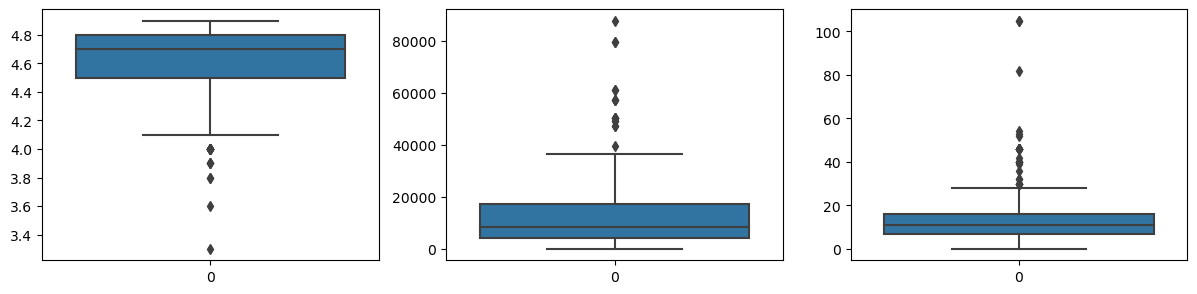

In [15]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(df['User Rating'])

plt.subplot(4,4,2)
sns.boxplot(df['Reviews'])

plt.subplot(4,4,3)
sns.boxplot(df['Price'])

### Using numpy.clip() function to clip (limit) the values in an array.
Syntax : numpy.clip(a,a_min,a_max,out=None)

In [16]:
df['Price'] = df['Price'].clip(lower=df['Price'].quantile(0.05), upper=df['Price'].quantile(0.95))

In [17]:
df['User Rating'] = df['User Rating'].clip(lower=df['User Rating'].quantile(0.05), upper=df['User Rating'].quantile(0.95))

In [18]:
df['Reviews'] = df['Reviews'].clip(lower=df['Reviews'].quantile(0.05), upper=df['Reviews'].quantile(0.95))

<Axes: >

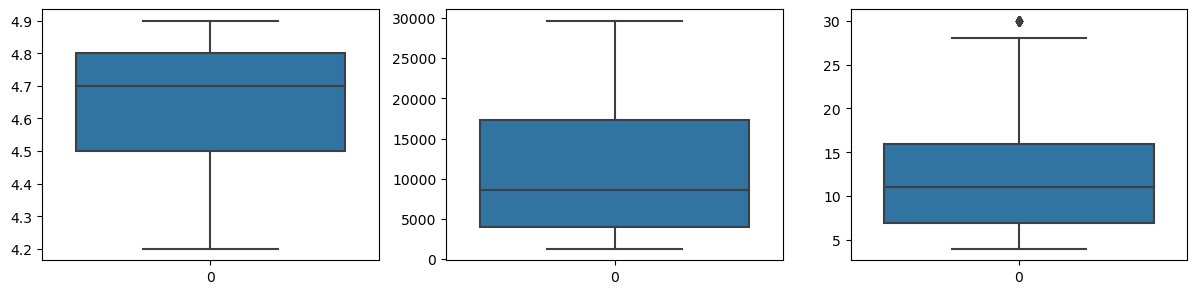

In [19]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(df['User Rating'])

plt.subplot(4,4,2)
sns.boxplot(df['Reviews'])

plt.subplot(4,4,3)
sns.boxplot(df['Price'])

## Explore trend over year for each Genre

<Axes: xlabel='Year', ylabel='count'>

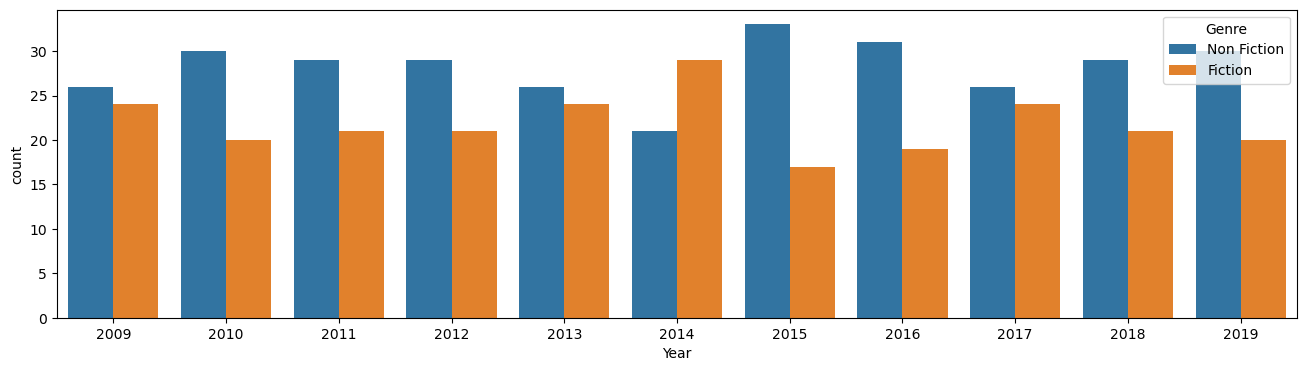

In [20]:
plt.figure(figsize=(16,4))

sns.countplot(x='Year', data=df, hue='Genre')

## Authors with number of Best Selling books - Top10

In [22]:
df['Author'].value_counts().head(10).index

Index(['Jeff Kinney', 'Gary Chapman', 'Rick Riordan', 'Suzanne Collins',
       'American Psychological Association', 'Dr. Seuss', 'Gallup',
       'Rob Elliott', 'Stephen R. Covey', 'Stephenie Meyer'],
      dtype='object', name='Author')

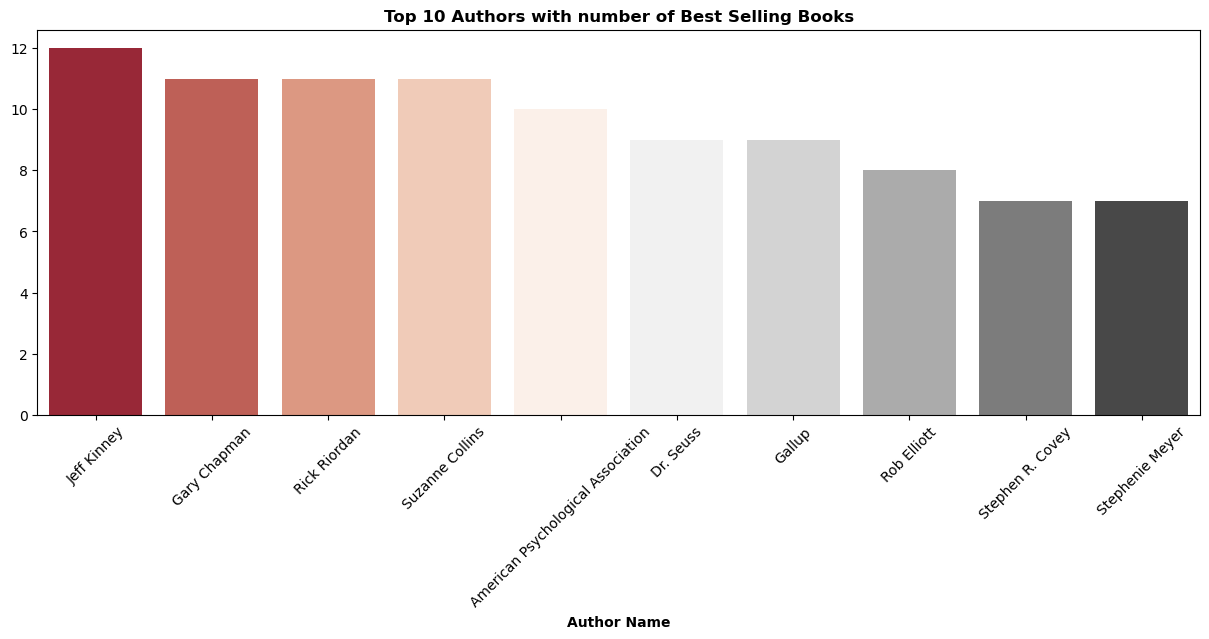

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['Author'].value_counts().head(10).index, y=df['Author'].value_counts().head(10).values, palette='RdGy')

plt.xlabel('Author Name', fontweight = 'bold', fontsize=10)
plt.title('Top 10 Authors with number of Best Selling Books', fontweight='bold')
plt.xticks(rotation = 45)
plt.show()

In [26]:
df_price = df.groupby(['Name', 'Author', 'Genre'], as_index=False)['Price'].mean()

The mean of Price is: 12.438237688237688
The median of Price is: 11.0


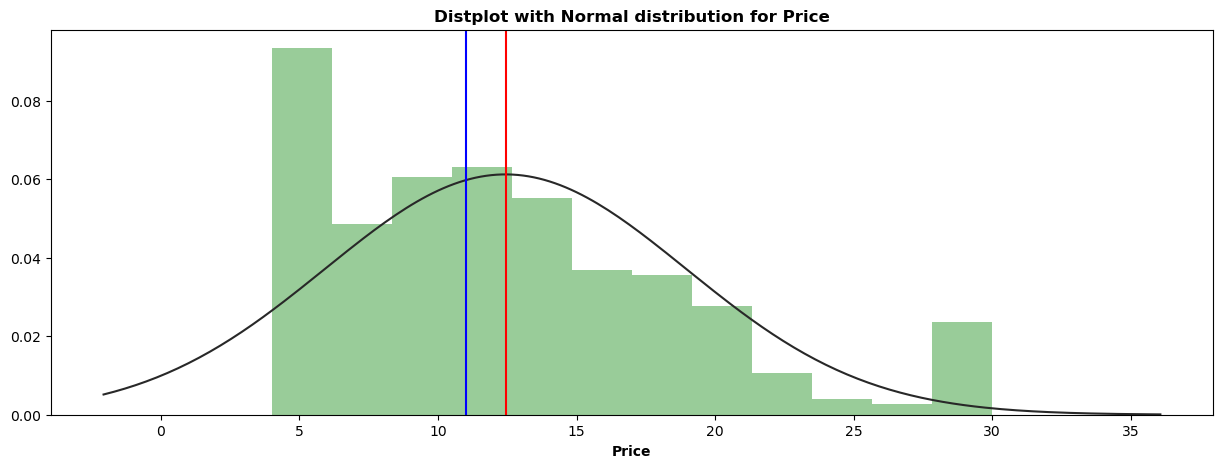

In [31]:
plt.figure(figsize=(15,5))
sns.distplot(df_price['Price'],fit=norm,kde=False,color=['green'])
plt.axvline(df_price['Price'].mean(),color='red')
plt.axvline(df_price['Price'].median(), color='blue')
plt.title('Distplot with Normal distribution for Price',fontweight="bold")
plt.xlabel('Price',fontweight="bold",fontsize=10)

print("The mean of Price is: {}".format(df_price['Price'].mean()))
print("The median of Price is: {}".format(df_price['Price'].median()))

plt.show()